In [1]:
# Step 1 Install Boost library (1.77.0)
# Approximately 20 minutes
!wget https://boostorg.jfrog.io/artifactory/main/release/1.77.0/source/boost_1_77_0.tar.gz
!tar -xvzf boost_1_77_0.tar.gz

ストリーミング出力は最後の 5000 行に切り捨てられました。
boost_1_77_0/doc/html/boost/proto/functional/pop_back.html
boost_1_77_0/doc/html/boost/proto/functional/pop_front/
boost_1_77_0/doc/html/boost/proto/functional/pop_front/resu_1_3_34_5_15_2_1_1_1_4.html
boost_1_77_0/doc/html/boost/proto/functional/pop_front/resu_1_3_34_5_15_2_1_1_1_5.html
boost_1_77_0/doc/html/boost/proto/functional/pop_front.html
boost_1_77_0/doc/html/boost/proto/functional/push_back/
boost_1_77_0/doc/html/boost/proto/functional/push_back/resu_1_3_34_5_16_2_1_1_1_4.html
boost_1_77_0/doc/html/boost/proto/functional/push_back.html
boost_1_77_0/doc/html/boost/proto/functional/push_front/
boost_1_77_0/doc/html/boost/proto/functional/push_front/resu_1_3_34_5_17_2_1_1_1_4.html
boost_1_77_0/doc/html/boost/proto/functional/push_front.html
boost_1_77_0/doc/html/boost/proto/functional/reverse/
boost_1_77_0/doc/html/boost/proto/functional/reverse/resu_1_3_34_5_18_2_1_1_1_4.html
boost_1_77_0/doc/html/boost/proto/functional/reverse/resu_1_3_34_5_18_2

In [2]:
!cd boost_1_77_0 && ./bootstrap.sh && ./b2 install --prefix=/usr/local

ストリーミング出力は最後の 5000 行に切り捨てられました。
common.copy /usr/local/include/boost/numeric/ublas/detail/duff.hpp
common.copy /usr/local/include/boost/numeric/ublas/detail/documentation.hpp
common.copy /usr/local/include/boost/numeric/ublas/detail/definitions.hpp
common.copy /usr/local/include/boost/numeric/ublas/detail/config.hpp
common.copy /usr/local/include/boost/numeric/ublas/detail/concepts.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/unwrap_reference.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/unit_helper.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/ublas_wrapper.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/stepper_traits.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/state_wrapper.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/split_adaptor.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/split.hpp
common.copy /usr/local/include/boost/numeric/odeint/util/same_size.hpp
common.copy /usr/loca

In [2]:
%cd /content/boost_1_77_0
!./bootstrap.sh
!./b2 install --prefix=/content/boost_1_77_0/stage

ストリーミング出力は最後の 5000 行に切り捨てられました。
common.copy /content/boost_1_77_0/stage/include/boost/numeric/ublas/detail/iterator.hpp
common.copy /content/boost_1_77_0/stage/include/boost/numeric/ublas/detail/documentation.hpp
common.copy /content/boost_1_77_0/stage/include/boost/numeric/ublas/detail/definitions.hpp
common.copy /content/boost_1_77_0/stage/include/boost/numeric/ublas/detail/config.hpp
common.copy /content/boost_1_77_0/stage/include/boost/numeric/ublas/detail/concepts.hpp
common.copy /content/boost_1_77_0/stage/include/boost/numeric/odeint/util/unwrap_reference.hpp
common.copy /content/boost_1_77_0/stage/include/boost/numeric/odeint/util/unit_helper.hpp
common.copy /content/boost_1_77_0/stage/include/boost/numeric/odeint/util/ublas_wrapper.hpp
common.copy /content/boost_1_77_0/stage/include/boost/numeric/odeint/util/stepper_traits.hpp
common.copy /content/boost_1_77_0/stage/include/boost/numeric/odeint/util/state_wrapper.hpp
common.copy /content/boost_1_77_0/stage/include/boost/numeri

In [3]:
# Step 2: Clone Vina-GPU-CUDA repository
%cd /content
!git clone https://github.com/Glinttsd/Vina-GPU-CUDA.git

/content
Cloning into 'Vina-GPU-CUDA'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 297 (delta 17), reused 19 (delta 9), pack-reused 257
Receiving objects: 100% (297/297), 69.26 MiB | 13.20 MiB/s, done.
Resolving deltas: 100% (114/114), done.
Updating files: 100% (264/264), done.


In [4]:
# Step 3: Navigate to the Vina-GPU-CUDA directory
%cd /content/Vina-GPU-CUDA

/content/Vina-GPU-CUDA


In [5]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [6]:
!which nvcc

/usr/local/cuda/bin/nvcc


In [7]:
# Step 4: Set up Makefile
# Update the Makefile paths for BOOST_LIB_PATH and NVCC_COMPILER (example paths shown, adjust as necessary)
!sed -i 's|BOOST_LIB_PATH=.*|BOOST_LIB_PATH=/content/boost_1_77_0|' Makefile
!sed -i 's|NVCC_COMPILER=.*|NVCC_COMPILER=/usr/local/cuda-12.2/bin/nvcc|' Makefile

In [8]:
# Step 5: Compile the binary
!make clean
!make cuda

rm Vina-GPU
rm: cannot remove 'Vina-GPU': No such file or directory
make: *** [Makefile:22: clean] Error 1
/usr/local/cuda-12.2/bin/nvcc -o Vina-GPU -I/content/boost_1_77_0 -I/content/boost_1_77_0/boost  -I./lib -I./inc/ -I./inc/cuda  ./main/main.cpp -O3 ./lib/*.cpp /content/boost_1_77_0/libs/thread/src/pthread/thread.cpp /content/boost_1_77_0/libs/thread/src/pthread/once.cpp  ./inc/cuda/kernel2.cu -lboost_program_options -lboost_system -lboost_filesystem -lstdc++ -lm -lpthread -L/content/boost_1_77_0/stage/lib -DGRID_DIM1=64 -DGRID_DIM2=128   -DBUILD_KERNEL_FROM_SOURCE
In file included from /content/boost_1_77_0/boost/config/header_deprecated.hpp:18,
                 from /content/boost_1_77_0/boost/progress.hpp:22,
                 from ./lib/monte_carlo.cpp:33:
/content/boost_1_77_0/boost/config/pragma_message.hpp:24:34: note: ‘#pragma message: This header is deprecated. Use the facilities in <boost/timer/timer.hpp> or <boost/timer/progress_display.hpp> instead.’
   24 | # define BO

In [9]:
# Step 6: Install RDKit library
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 37.3 MB/s eta 0:00:00


In [10]:
# Step 7: Install Biopython library
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 6.5 MB/s eta 0:00:00


In [11]:
# Step 8: Install Miniconda and fpocket library
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install conda-forge::fpocket --yes

--2024-06-13 05:05:53--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.177.84, 104.18.176.84, 2606:4700::6812:b054, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.177.84|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2024-06-13 05:05:53--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143808873 (137M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 137.15M   306MB/s    in 0.4s    

2024-06-13 05:05:53 (306 MB/s) - ‘Miniconda

In [12]:
# Step 9: Install the Open Babel software
!apt-get -qq install -y openbabel

Selecting previously unselected package libinchi1.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../libinchi1_1.03+dfsg-4_amd64.deb ...
Unpacking libinchi1 (1.03+dfsg-4) ...
Selecting previously unselected package libmaeparser1:amd64.
Preparing to unpack .../libmaeparser1_1.2.4-1build1_amd64.deb ...
Unpacking libmaeparser1:amd64 (1.2.4-1build1) ...
Selecting previously unselected package libopenbabel7.
Preparing to unpack .../libopenbabel7_3.1.1+dfsg-6ubuntu5_amd64.deb ...
Unpacking libopenbabel7 (3.1.1+dfsg-6ubuntu5) ...
Selecting previously unselected package openbabel.
Preparing to unpack .../openbabel_3.1.1+dfsg-6ubuntu5_amd64.deb ...
Unpacking openbabel (3.1.1+dfsg-6ubuntu5) ...
Setting up libmaeparser1:amd64 (1.2.4-1build1) ...
Setting up libinchi1 (1.03+dfsg-4) ...
Setting up libopenbabel7 (3.1.1+dfsg-6ubuntu5) ...
Setting up openbabel (3.1.1+dfsg-6ubuntu5) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.r

In [13]:
# Step 10: Download AlphaFold data for the selected species

import ipywidgets as widgets
from IPython.display import display
import requests
from tqdm.notebook import tqdm

# Download function
def download_tar_file(url, destination_folder='/content'):
    file_name = url.split('/')[-1]
    destination_path = f"{destination_folder}/{file_name}"

    response = requests.get(url, stream=True)
    if response.status_code != 200:
        print(f"Failed to download file {file_name}.")
        return

    total_size_in_bytes = int(response.headers.get('content-length', 0))
    block_size = 1024
    progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)

    with open(destination_path, 'wb') as file:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()

    if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
        print("An error occurred.")
    else:
        print(f"Download of {file_name} completed. Saved to: {destination_path}")

# Dictionary of species names and corresponding URLs
download_urls = {
    'Arabidopsis': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000006548_3702_ARATH_v4.tar',
    'Nematode worm': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000001940_6239_CAEEL_v4.tar',
    'C. albicans': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000559_237561_CANAL_v4.tar',
    'Zebrafish': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000437_7955_DANRE_v4.tar',
    'Dictyostelium': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002195_44689_DICDI_v4.tar',
    'Fruit fly': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000803_7227_DROME_v4.tar',
    'E. coli': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000625_83333_ECOLI_v4.tar',
    'Soybean': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000008827_3847_SOYBN_v4.tar',
    'Human': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000005640_9606_HUMAN_v4.tar',
    'M. jannaschii': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000805_243232_METJA_v4.tar',
    'Mouse': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000589_10090_MOUSE_v4.tar',
    'Asian rice': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000059680_39947_ORYSJ_v4.tar',
    'Rat': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002494_10116_RAT_v4.tar',
    'Budding yeast': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002311_559292_YEAST_v4.tar',
    'Fission yeast': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002485_284812_SCHPO_v4.tar',
    'Maize': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000007305_4577_MAIZE_v4.tar',
    'Ajellomyces capsulatus': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000001631_447093_AJECG_v4.tar',
    'Brugia malayi': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000006672_6279_BRUMA_v4.tar',
    'C. jejuni': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000799_192222_CAMJE_v4.tar',
    'Cladophialophora carrionii': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000094526_86049_9EURO1_v4.tar',
    'Dracunculus medinensis': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000274756_318479_DRAME_v4.tar',
    'Enterococcus faecium': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000325664_1352_ENTFC_v4.tar',
    'Fonsecaea pedrosoi': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000053029_1442368_9EURO2_v4.tar',
    'H. influenzae': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000579_71421_HAEIN_v4.tar',
    'H. pylori': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000429_85962_HELPY_v4.tar',
    'K. pneumoniae': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000007841_1125630_KLEPH_v4.tar',
    'L. infantum': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000008153_5671_LEIIN_v4.tar',
    'Madurella mycetomatis': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000078237_100816_9PEZI1_v4.tar',
    'Mycobacterium leprae': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000806_272631_MYCLE_v4.tar',
    'M. tuberculosis': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000001584_83332_MYCTU_v4.tar',
    'Mycobacterium ulcerans': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000020681_1299332_MYCUL_v4.tar',
    'N. gonorrhoeae': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000535_242231_NEIG1_v4.tar',
    'Nocardia brasiliensis': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000006304_1133849_9NOCA1_v4.tar',
    'Onchocerca volvulus': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000024404_6282_ONCVO_v4.tar',
    'Paracoccidioides lutzii': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002059_502779_PARBA_v4.tar',
    'P. falciparum': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000001450_36329_PLAF7_v4.tar',
    'P. aeruginosa': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002438_208964_PSEAE_v4.tar',
    'S. typhimurium': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000001014_99287_SALTY_v4.tar',
    'Schistosoma mansoni': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000008854_6183_SCHMA_v4.tar',
    'S. dysenteriae': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002716_300267_SHIDS_v4.tar',
    'Sporothrix schenckii': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000018087_1391915_SPOS1_v4.tar',
    'S. aureus': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000008816_93061_STAA8_v4.tar',
    'S. pneumoniae': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000000586_171101_STRR6_v4.tar',
    'Strongyloides stercoralis': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000035681_6248_STRER_v4.tar',
    'Trichuris trichiura': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000030665_36087_TRITR_v4.tar',
    'Trypanosoma brucei': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000008524_185431_TRYB2_v4.tar',
    'T. cruzi': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000002296_353153_TRYCC_v4.tar',
    'Wuchereria bancrofti': 'https://ftp.ebi.ac.uk/pub/databases/alphafold/latest/UP000270924_6293_WUCBA_v4.tar',
}

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=download_urls.keys(),
    description='species:',
    disabled=False,
)

# Download button and its event handler
button = widgets.Button(description="Download")

def on_button_clicked(b):
    species = dropdown.value
    url = download_urls[species]
    print(f"Downloading data for {species}...")
    download_tar_file(url)

button.on_click(on_button_clicked)

# Display the widgets
display(dropdown, button)

Dropdown(description='species:', options=('Arabidopsis', 'Nematode worm', 'C. albicans', 'Zebrafish', 'Dictyos…

Button(description='Download', style=ButtonStyle())

  0%|          | 0.00/3.90G [00:00<?, ?iB/s]

  0%|          | 0.00/182M [00:00<?, ?iB/s]

Download of UP000000805_243232_METJA_v4.tar completed. Saved to: /content/UP000000805_243232_METJA_v4.tar


In [14]:
# Step 11: Unpack the downloaded AlphaFold data for the selected species

import os

import glob
import tarfile

def extract_tar_file(folder_path, extract_to):
    """
    Extracts the first tar file found in the specified folder.

    Args:
    folder_path (str): Path to the folder where the tar file is located.
    extract_to (str): Path to the folder where the file will be extracted.
    """
    tar_file = next(glob.iglob(os.path.join(folder_path, '*.tar')), None)
    if not tar_file:
        print("No tar file found.")
        return

    # Create the extraction destination folder (do nothing if it already exists)
    os.makedirs(extract_to, exist_ok=True)

    with tarfile.open(tar_file, "r:") as tar:
        tar.extractall(path=extract_to)
        print(f"File {tar_file} extracted to {extract_to}.")

folder_path = '/content'
extract_to = '/content/rawpdb'
extract_tar_file(folder_path, extract_to)

File /content/UP000000805_243232_METJA_v4.tar extracted to /content/rawpdb.


In [15]:
import gzip
import shutil
# Get all .gz files in the directory
gz_files = [f for f in os.listdir('/content/rawpdb') if f.endswith('.gz')]

# Extract each .gz file
for gz_file in gz_files:
    with gzip.open(f'/content/rawpdb/{gz_file}', 'rb') as f_in:
        with open(f'/content/rawpdb/{gz_file[:-3]}', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [16]:
# Step 12: Counting the extracted PDB files
import os

# Folder containing extracted PDB files
pdb_folder = "/content/rawpdb"

# Count the number of PDB files
pdb_count = len([filename for filename in os.listdir(pdb_folder) if filename.endswith(".pdb")])

print(f"Number of PDB files: {pdb_count}")


Number of PDB files: 1773


In [17]:
# Step 13: Narrow down the pdb files used for docking
# It is recommended to narrow it down to within 1000 items
# If you manually set the plDDT value and sort files accordingly...
# Count the number of files with plDDT scores equal to or higher than a specified plDDT value

import os

def extract_plDDT_scores_from_file(pdb_file_path):
    """Function to extract plDDT scores (B-factors) from the specified PDB file and compute their average."""
    plDDT_scores = []
    with open(pdb_file_path, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                # The B-factor (plDDT score) is located in the second-to-last column of each ATOM record
                plDDT_score = float(line.split()[-2])
                plDDT_scores.append(plDDT_score)

    # Compute the average plDDT score
    average_plDDT_score = sum(plDDT_scores) / len(plDDT_scores) if plDDT_scores else 0
    return average_plDDT_score

# Function to count files with plDDT scores above a specified threshold in a folder
def count_files_above_plDDT(directory, plDDT_threshold):
    above_threshold_count = 0
    for filename in os.listdir(directory):
        if filename.endswith('.pdb'):
            filepath = os.path.join(directory, filename)
            average_plDDT = extract_plDDT_scores_from_file(filepath)
            if average_plDDT >= plDDT_threshold:
                above_threshold_count += 1
    return above_threshold_count

# Set the plDDT threshold value
plDDT_threshold = float(input("Enter the plDDT threshold value: "))

# Display the number of files with plDDT score >= threshold in the folder
directory = '/content/rawpdb'
files_above_threshold = count_files_above_plDDT(directory, plDDT_threshold)
print(f"Number of files with plDDT score >= {plDDT_threshold}: {files_above_threshold}")


Enter the plDDT threshold value: 98
Number of files with plDDT score >= 98.0: 17


In [18]:
# Filter pdb files based on specified pLDDT value using the count obtained from the previous script.
from IPython.display import display

# Create options in increments of 1
options = [(str(i), i) for i in range(0, 101, 1)]

# Create the dropdown list
pLDDT_cutoff = widgets.Dropdown(
    options=options,
    value=98,
    description='pLDDT Cutoff:',
)

# Display the dropdown
display(pLDDT_cutoff)

Dropdown(description='pLDDT Cutoff:', index=98, options=(('0', 0), ('1', 1), ('2', 2), ('3', 3), ('4', 4), ('5…

In [19]:
# Define a function extract_plDDT_scores_from_file that extracts plDDT scores (B-factors) from the specified PDB file and calculates their average
def extract_plDDT_scores_from_file(pdb_file_path):
    """Function to extract plDDT scores (B-factors) from the specified PDB file and compute their average."""
    plDDT_scores = []
    with open(pdb_file_path, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                # The B-factor (plDDT score) is located in the second-to-last column of each ATOM record
                plDDT_score = float(line.split()[-2])
                plDDT_scores.append(plDDT_score)

    # The B-factor (plDDT score) is located in the second-to-last column of each ATOM record
    average_plDDT_score = sum(plDDT_scores) / len(plDDT_scores) if plDDT_scores else 0
    return average_plDDT_score

# Process all PDB files in the '/content/rawpdb' directory
directory = '/content/rawpdb'
for filename in os.listdir(directory):
    if filename.endswith('.pdb'):
        filepath = os.path.join(directory, filename)
        average_plDDT = extract_plDDT_scores_from_file(filepath)
        print(f"{filename}: Average plDDT Score = {average_plDDT:.2f}")

AF-Q58010-F1-model_v4.pdb: Average plDDT Score = 93.58
AF-Q58528-F1-model_v4.pdb: Average plDDT Score = 91.49
AF-Q58002-F1-model_v4.pdb: Average plDDT Score = 88.49
AF-Q58218-F1-model_v4.pdb: Average plDDT Score = 97.86
AF-Q58130-F1-model_v4.pdb: Average plDDT Score = 97.45
AF-Q58532-F1-model_v4.pdb: Average plDDT Score = 84.22
AF-Q58745-F1-model_v4.pdb: Average plDDT Score = 96.38
AF-Q57914-F1-model_v4.pdb: Average plDDT Score = 88.00
AF-Q58117-F1-model_v4.pdb: Average plDDT Score = 91.93
AF-Q57843-F1-model_v4.pdb: Average plDDT Score = 96.51
AF-Q58484-F1-model_v4.pdb: Average plDDT Score = 96.98
AF-Q57858-F1-model_v4.pdb: Average plDDT Score = 88.32
AF-Q57673-F1-model_v4.pdb: Average plDDT Score = 94.42
AF-P54009-F1-model_v4.pdb: Average plDDT Score = 93.53
AF-Q57949-F1-model_v4.pdb: Average plDDT Score = 88.49
AF-Q60273-F1-model_v4.pdb: Average plDDT Score = 87.82
AF-Q58930-F1-model_v4.pdb: Average plDDT Score = 83.38
AF-Q60353-F1-model_v4.pdb: Average plDDT Score = 93.91
AF-Q57764-

In [20]:
# Run fpocket on PDB files selected by the specified plDDT value
import os
import shutil

# User-defined pLDDT threshold
pLDDT_value = pLDDT_cutoff.value

# Create the fpocket output directory (do nothing if it already exists)
os.makedirs('/content/fpocketout', exist_ok=True)
selected_files_dir = '/content/fpocketout/selected_files'
os.makedirs(selected_files_dir, exist_ok=True)

# List to store selected files
selected_files = []

# Process all PDB files in the '/content/rawpdb' directory
directory = '/content/rawpdb'
for filename in os.listdir(directory):
    if filename.endswith('.pdb'):
        filepath = os.path.join(directory, filename)
        average_plDDT = extract_plDDT_scores_from_file(filepath)
        if average_plDDT > pLDDT_value:
            selected_files.append(filename)
            # Copy selected files to the specified directory
            shutil.copy(filepath, os.path.join(selected_files_dir, filename))

# Display selected files
print(f"\nTotal number of selected files: {len(selected_files)}")
print("Selected Files:")
for file in selected_files:
    print(file)
print(f"\nTotal number of selected files: {len(selected_files)}")



Total number of selected files: 17
Selected Files:
AF-Q58588-F1-model_v4.pdb
AF-Q58337-F1-model_v4.pdb
AF-Q57851-F1-model_v4.pdb
AF-Q57695-F1-model_v4.pdb
AF-Q58569-F1-model_v4.pdb
AF-Q58396-F1-model_v4.pdb
AF-Q58033-F1-model_v4.pdb
AF-Q57659-F1-model_v4.pdb
AF-Q58255-F1-model_v4.pdb
AF-Q58691-F1-model_v4.pdb
AF-Q57839-F1-model_v4.pdb
AF-Q58563-F1-model_v4.pdb
AF-Q57846-F1-model_v4.pdb
AF-Q58441-F1-model_v4.pdb
AF-Q60387-F1-model_v4.pdb
AF-Q58273-F1-model_v4.pdb
AF-Q57766-F1-model_v4.pdb

Total number of selected files: 17


In [21]:
# Run fpocket on each selected PDB file

import os
import subprocess

for i, pdb_file in enumerate(selected_files):
    subprocess.run(['fpocket', '-f', f'/content/fpocketout/selected_files/{pdb_file}', '-o', '/content/fpocketout'])
    print(f"Processed {i+1} of {len(selected_files)} files ({(i+1)/len(selected_files)*100:.2f}% complete)")


Processed 1 of 17 files (5.88% complete)
Processed 2 of 17 files (11.76% complete)
Processed 3 of 17 files (17.65% complete)
Processed 4 of 17 files (23.53% complete)
Processed 5 of 17 files (29.41% complete)
Processed 6 of 17 files (35.29% complete)
Processed 7 of 17 files (41.18% complete)
Processed 8 of 17 files (47.06% complete)
Processed 9 of 17 files (52.94% complete)
Processed 10 of 17 files (58.82% complete)
Processed 11 of 17 files (64.71% complete)
Processed 12 of 17 files (70.59% complete)
Processed 13 of 17 files (76.47% complete)
Processed 14 of 17 files (82.35% complete)
Processed 15 of 17 files (88.24% complete)
Processed 16 of 17 files (94.12% complete)
Processed 17 of 17 files (100.00% complete)


In [22]:
# Step 13: Narrow down the pdb files used for docking
# It is recommended to narrow it down to within 1000 items
# If you want to manually set the top number of plDDT values...
# ex) Combine the top 50 files by plDDT score into a new directory

import os
import shutil

def extract_plDDT_scores_from_file(pdb_file_path):
    """Function to extract plDDT scores (B-factors) from the specified PDB file and compute their average."""
    plDDT_scores = []
    with open(pdb_file_path, 'r') as file:
        for line in file:
            if line.startswith("ATOM"):
                # The B-factor (plDDT score) is located in the second-to-last column of each ATOM record
                plDDT_score = float(line.split()[-2])
                plDDT_scores.append(plDDT_score)

    # Compute the average plDDT score
    average_plDDT_score = sum(plDDT_scores) / len(plDDT_scores) if plDDT_scores else 0
    return average_plDDT_score

# Process all PDB files in the '/content/rawpdb' directory and collect plDDT scores
directory = '/content/rawpdb'
pdb_scores = []

for filename in os.listdir(directory):
    if filename.endswith('.pdb'):
        filepath = os.path.join(directory, filename)
        average_plDDT = extract_plDDT_scores_from_file(filepath)
        pdb_scores.append((filename, average_plDDT))

# Sort by plDDT score and select the top 50
pdb_scores_sorted = sorted(pdb_scores, key=lambda x: x[1], reverse=True)[:50]

# Create a new folder
output_directory = '/content/top50_plDDT_pdb'
os.makedirs(output_directory, exist_ok=True)

# Copy the top 50 PDB files to the new folder
for pdb_file, score in pdb_scores_sorted:
    src_path = os.path.join(directory, pdb_file)
    dst_path = os.path.join(output_directory, pdb_file)
    shutil.copy(src_path, dst_path)

print(f"Top 50 PDB files with highest average plDDT scores have been copied to {output_directory}")


Top 50 PDB files with highest average plDDT scores have been copied to /content/top50_plDDT_pdb


In [23]:
# Run fpocket on each selected PDB file
# ex) Combine the top 50 files by plDDT score into a new directory

import os
import subprocess

# Get PDB files in the /content/top50_plDDT_pdb directory
pdb_directory = '/content/top50_plDDT_pdb'
output_directory = '/content/fpocketout'

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# List all PDB files in the directory
pdb_files = [file for file in os.listdir(pdb_directory) if file.endswith('.pdb')]

# Run fpocket on each PDB file
for i, pdb_file in enumerate(pdb_files):
    pdb_path = os.path.join(pdb_directory, pdb_file)
    subprocess.run(['fpocket', '-f', pdb_path, '-o', output_directory])
    print(f"Processed {i+1} of {len(pdb_files)} files ({(i+1)/len(pdb_files)*100:.2f}% complete)")


Processed 1 of 50 files (2.00% complete)
Processed 2 of 50 files (4.00% complete)
Processed 3 of 50 files (6.00% complete)
Processed 4 of 50 files (8.00% complete)
Processed 5 of 50 files (10.00% complete)
Processed 6 of 50 files (12.00% complete)
Processed 7 of 50 files (14.00% complete)
Processed 8 of 50 files (16.00% complete)
Processed 9 of 50 files (18.00% complete)
Processed 10 of 50 files (20.00% complete)
Processed 11 of 50 files (22.00% complete)
Processed 12 of 50 files (24.00% complete)
Processed 13 of 50 files (26.00% complete)
Processed 14 of 50 files (28.00% complete)
Processed 15 of 50 files (30.00% complete)
Processed 16 of 50 files (32.00% complete)
Processed 17 of 50 files (34.00% complete)
Processed 18 of 50 files (36.00% complete)
Processed 19 of 50 files (38.00% complete)
Processed 20 of 50 files (40.00% complete)
Processed 21 of 50 files (42.00% complete)
Processed 22 of 50 files (44.00% complete)
Processed 23 of 50 files (46.00% complete)
Processed 24 of 50 files

In [24]:
# Step 14: Compress PDB files used for docking into gzip format

import os
import gzip
import shutil

def compress_pdb_files(input_folder, output_file):
    # Create a list to store the paths of all PDB files in the specified directory
    pdb_files = []

    # Iterate through all files in the specified directory
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            # Check if the file has a .pdb extension
            if file.endswith(".pdb"):
                pdb_file_path = os.path.join(root, file)
                pdb_files.append(pdb_file_path)

    # Open the output gzip file in write mode
    with gzip.open(output_file, 'wb') as f_out:
        # Iterate through all PDB files and write their contents to the gzip file
        for pdb_file_path in pdb_files:
            with open(pdb_file_path, 'rb') as f_in:
                shutil.copyfileobj(f_in, f_out)
                print(f"Added to archive: {pdb_file_path}")

# Set the path to the folder containing pdb files
input_folder = "/content/fpocketout/selected_files"

# Set the path for the output compressed file
output_file = "/content/selected_files_archive.gz"

# Compress all pdb files in the specified folder into one compressed file
compress_pdb_files(input_folder, output_file)



Added to archive: /content/fpocketout/selected_files/AF-Q58588-F1-model_v4.pdb
Added to archive: /content/fpocketout/selected_files/AF-Q58337-F1-model_v4.pdb
Added to archive: /content/fpocketout/selected_files/AF-Q57851-F1-model_v4.pdb
Added to archive: /content/fpocketout/selected_files/AF-Q57695-F1-model_v4.pdb
Added to archive: /content/fpocketout/selected_files/AF-Q58569-F1-model_v4.pdb
Added to archive: /content/fpocketout/selected_files/AF-Q58396-F1-model_v4.pdb
Added to archive: /content/fpocketout/selected_files/AF-Q58033-F1-model_v4.pdb
Added to archive: /content/fpocketout/selected_files/AF-Q57659-F1-model_v4.pdb
Added to archive: /content/fpocketout/selected_files/AF-Q58255-F1-model_v4.pdb
Added to archive: /content/fpocketout/selected_files/AF-Q58691-F1-model_v4.pdb
Added to archive: /content/fpocketout/selected_files/AF-Q57839-F1-model_v4.pdb
Added to archive: /content/fpocketout/selected_files/AF-Q58563-F1-model_v4.pdb
Added to archive: /content/fpocketout/selected_files

In [25]:
# Step 15: Calculate centroid coordinates
import numpy as np

def calculate_centroid_of_cluster1(pdb_file):
    """Calculate the centroid coordinates of cluster 1 from the _out.pdb file"""
    coordinates = []
    with open(pdb_file, 'r') as file:
        for line in file:
            if line.startswith("HETATM"):
                parts = line.split()
                cluster_number = parts[5]
                if cluster_number == "1":
                    x, y, z = float(parts[6]), float(parts[7]), float(parts[8])
                    coordinates.append([x, y, z])

    if coordinates:
        centroid = np.mean(coordinates, axis=0)
        return centroid
    else:
        return None

# Process _out.pdb files in the '/content/fpocketout/selected_files' directory
directory = '/content/top50_plDDT_pdb'
results = {}

for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    if os.path.isdir(folder_path):
        pdb_file = os.path.join(folder_path, f"{folder}.pdb")
        if os.path.isfile(pdb_file):
            centroid = calculate_centroid_of_cluster1(pdb_file)
            if centroid is not None:
                results[folder] = centroid

# Display results
for protein, centroid in results.items():
    print(f"{protein}: Centroid Coordinates = {centroid}")
with open('/content/pocket_centroids.txt', 'w') as output_file:
    for protein, centroid in results.items():
        output_file.write(f"{protein}: {centroid[0]} {centroid[1]} {centroid[2]}\n")

AF-Q58571-F1-model_v4_out: Centroid Coordinates = [-6.52961667 14.10985     2.95005   ]
AF-Q57703-F1-model_v4_out: Centroid Coordinates = [ 2.14755357 -4.766875    3.14019643]
AF-Q60387-F1-model_v4_out: Centroid Coordinates = [ 10.12154545  16.75684848 -11.6510303 ]
AF-Q57758-F1-model_v4_out: Centroid Coordinates = [ -1.49386111  -9.28322222 -10.62302778]
AF-Q58649-F1-model_v4_out: Centroid Coordinates = [  4.148275   2.656675 -12.83355 ]
AF-Q57851-F1-model_v4_out: Centroid Coordinates = [10.88964286  5.18289286  4.00639286]
AF-Q57834-F1-model_v4_out: Centroid Coordinates = [-2.385      19.25183333 10.29633333]
AF-Q58502-F1-model_v4_out: Centroid Coordinates = [-0.88720225  4.88783146  4.23150562]
AF-Q57894-F1-model_v4_out: Centroid Coordinates = [ -5.133      -11.77069231   5.55869231]
AF-Q58944-F1-model_v4_out: Centroid Coordinates = [15.22331481  8.6125     12.58977778]
AF-Q57630-F1-model_v4_out: Centroid Coordinates = [ 2.64021429 13.12146429  5.52871429]
AF-Q58337-F1-model_v4_out:

In [26]:
# Step 16: Preprocessing of proteins
# Removed HETATM lines from the PDB file and kept only the ATOM lines

import os
from Bio.PDB import PDBParser, PDBIO

def remove_non_atom(input_pdb_file, output_pdb_file):
    # Create a PDB parser
    parser = PDBParser(QUIET=True)

    # Load the PDB file
    structure = parser.get_structure('protein', input_pdb_file)

    # Filter out non-ATOM residues
    for model in structure:
        for chain in model:
            residues_to_remove = []
            for residue in chain:
                if residue.get_id()[0] != ' ':
                    residues_to_remove.append(residue)
            for residue in residues_to_remove:
                chain.detach_child(residue.id)

    # Save the modified structure in PDB format
    io = PDBIO()
    io.set_structure(structure)
    io.save(output_pdb_file, write_end=False)

def process_folder(input_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each PDB file in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.pdb'):
            input_file_path = os.path.join(input_folder, filename)
            output_file_path = os.path.join(output_folder, filename.replace('.pdb', '_noHETATM.pdb'))
            remove_non_atom(input_file_path, output_file_path)

# Example usage:
input_folder = '/content/fpocketout/selected_files'
output_folder = '/content/noHETATM_pdb_folder'

process_folder(input_folder, output_folder)


In [27]:
# Add hydrogen and charge to proteins using OpenBabel

import os

# Input folder containing PDB files
input_folder = '/content/noHETATM_pdb_folder'  # Specify the path to the input folder containing PDB files

# Output folder for converted PDBQT files
output_folder = '/content/added_pdbqt_folder'  # Specify the path to the output folder for converted PDBQT files

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Get a list of PDB files in the input folder
pdb_files = [file for file in os.listdir(input_folder) if file.endswith('.pdb')]

# Loop through each PDB file and convert to PDBQT format with added hydrogens and charges using Open Babel
for pdb_file in pdb_files:
    input_pdb_path = os.path.join(input_folder, pdb_file)
    output_pdbqt_path = os.path.join(output_folder, os.path.splitext(pdb_file)[0] + '.pdbqt')

    # Command to add hydrogens, compute Gasteiger charges, and convert to PDBQT using Open Babel
    command = f'obabel {input_pdb_path} -h -c --partialcharge gasteiger -O {output_pdbqt_path}'

    # Run the command using os.system
    try:
        os.system(command)
        print(f'Converted file: {pdb_file}')
    except Exception as e:
        print(f'Error converting file: {pdb_file}')
        print(e)

Converted file: AF-Q57839-F1-model_v4_noHETATM.pdb
Converted file: AF-Q58441-F1-model_v4_noHETATM.pdb
Converted file: AF-Q58033-F1-model_v4_noHETATM.pdb
Converted file: AF-Q57659-F1-model_v4_noHETATM.pdb
Converted file: AF-Q57695-F1-model_v4_noHETATM.pdb
Converted file: AF-Q58691-F1-model_v4_noHETATM.pdb
Converted file: AF-Q58273-F1-model_v4_noHETATM.pdb
Converted file: AF-Q58396-F1-model_v4_noHETATM.pdb
Converted file: AF-Q57766-F1-model_v4_noHETATM.pdb
Converted file: AF-Q60387-F1-model_v4_noHETATM.pdb
Converted file: AF-Q58255-F1-model_v4_noHETATM.pdb
Converted file: AF-Q58588-F1-model_v4_noHETATM.pdb
Converted file: AF-Q57851-F1-model_v4_noHETATM.pdb
Converted file: AF-Q57846-F1-model_v4_noHETATM.pdb
Converted file: AF-Q58563-F1-model_v4_noHETATM.pdb
Converted file: AF-Q58337-F1-model_v4_noHETATM.pdb
Converted file: AF-Q58569-F1-model_v4_noHETATM.pdb


In [28]:
# Remove everything except the "ATOM" lines from the PDBQT file and shorten the file name

import os

def extract_atom_lines_from_pdbqt(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get a list of PDBQT files in the input folder
    pdbqt_files = [file for file in os.listdir(input_folder) if file.endswith('.pdbqt')]

    # Loop through each PDBQT file and extract 'ATOM' lines
    for pdbqt_file in pdbqt_files:
        input_pdbqt_path = os.path.join(input_folder, pdbqt_file)
        # Modify the output file name by removing '-model_v4_noHETATM.pdbqt'
        output_file_name = pdbqt_file.replace('-model_v4_noHETATM.pdbqt', '.pdbqt')
        output_pdbqt_path = os.path.join(output_folder, output_file_name)

        with open(input_pdbqt_path, 'r') as f_in:
            lines = f_in.readlines()

        atom_lines = [line for line in lines if line.startswith('ATOM')]

        with open(output_pdbqt_path, 'w') as f_out:
            f_out.writelines(atom_lines)

if __name__ == '__main__':
    # Input and output folder paths
    input_folder = '/content/added_pdbqt_folder'  # Specify the path to the input folder containing PDBQT files
    output_folder = '/content/atom_pdbpt_folder'  # Specify the path to the output folder for extracted PDBQT files

    # Call the function to extract 'ATOM' lines from PDBQT files
    extract_atom_lines_from_pdbqt(input_folder, output_folder)


In [29]:
# Step 17: Preprocessing of a ligand
# Script to move selected files into /content (needs to be in /content/ to be recognized)
from google.colab import files

# Select and upload local files
uploaded = files.upload()
uploaded_file = next(iter(uploaded))

# Move the uploaded files to the content folder
import shutil
shutil.move((uploaded_file), f"/content/{uploaded_file}")


Saving Conformer3D_COMPOUND_CID_123631.sdf to Conformer3D_COMPOUND_CID_123631.sdf


'/content/Conformer3D_COMPOUND_CID_123631.sdf'

In [30]:
# Add hydrogens, charges, and Gasteiger charges to the ligand using Open Babel
import subprocess
import os

def convert_to_pdbqt(input_pdb_path, output_pdbqt_path):
    # Command to convert PDB to PDBQT with Open Babel
    command = f'obabel {input_pdb_path} -O {output_pdbqt_path} -h -p 7.4 --partialcharge gasteiger'

    # Run the command using subprocess
    subprocess.run(command, shell=True)

# Input and output file paths
input_pdb_path = f"/content/{uploaded_file}"
uploaded_file_without_ext = os.path.splitext(uploaded_file)[0]
output_pdbqt_path = f'/content/{uploaded_file_without_ext}.pdbqt'
print(input_pdb_path)
print(output_pdbqt_path)

# Call the function to convert and add charges
convert_to_pdbqt(input_pdb_path, output_pdbqt_path)

/content/Conformer3D_COMPOUND_CID_123631.sdf
/content/Conformer3D_COMPOUND_CID_123631.pdbqt


In [31]:
# Step 18: Add executable permission to the binary
!chmod +x ./Vina-GPU

In [32]:
# Step 19: Set the LD_LIBRARY_PATH to include the Boost library path
import os
os.environ['LD_LIBRARY_PATH'] = '/content/boost_1_77_0/stage/lib:' + os.environ.get('LD_LIBRARY_PATH', '')

In [ ]:
!printenv LD_LIBRARY_PATH

/content/boost_1_77_0/stage/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64


In [33]:
# Step 20: Create config files to run vina-GPU (It takes about 15 seconds to dock one.)
import os

# Define paths and parameters
input_file = '/content/pocket_centroids.txt'
receptor_folder = '/content/atom_pdbpt_folder'
ligand_path = output_pdbqt_path
output_folder = '/content/results'
config_folder = '/content/config'

size_x = 20
size_y = 20
size_z = 20
num_threads = 8192

# Create directories if they don't exist
os.makedirs(output_folder, exist_ok=True)
os.makedirs(config_folder, exist_ok=True)

# Read receptor center coordinates from the input file
with open(input_file, 'r') as f:
    lines = f.readlines()

# Create a config file for each receptor
for line in lines:
    parts = line.strip().split(':')
    protein_name = parts[0].replace('-model_v4_out', '')
    coords = parts[1].strip().split()
    center_x, center_y, center_z = map(lambda x: round(float(x), 2), coords)

    # Create the config file path
    config_file = os.path.join(config_folder, f'{protein_name}_config.txt')

    # Write to the config file
    with open(config_file, 'w') as config:
        config.write(f'receptor = {os.path.join(receptor_folder, protein_name + ".pdbqt")}\n')
        config.write(f'ligand = {ligand_path}\n')
        config.write(f'out = {os.path.join(output_folder, protein_name + "_out.pdbqt")}\n')
        config.write(f'log = {os.path.join(output_folder, protein_name + "_out.txt")}\n')
        config.write(f'center_x = {center_x}\n')
        config.write(f'center_y = {center_y}\n')
        config.write(f'center_z = {center_z}\n')
        config.write(f'size_x = {size_x}\n')
        config.write(f'size_y = {size_y}\n')
        config.write(f'size_z = {size_z}\n')
        config.write(f'thread = {num_threads}\n')

In [34]:
# Step 21: Run vina-GPU
import os

# Setting up necessary directories and parameters
config_folder = '/content/config'
output_folder = '/content/results'
vina_executable = '/content/Vina-GPU-CUDA/Vina-GPU'

# Get all config files in the config folder
config_files = [os.path.join(config_folder, f) for f in os.listdir(config_folder) if f.endswith('_config.txt')]

# Perform docking for each config file
for config_file in config_files:
    # Construct the Vina-GPU execution command
    vina_cmd = f'{vina_executable} --config "{config_file}"'

    # Execute the command
    os.system(vina_cmd)

    # Check the results
    with open(config_file, 'r') as f:
        for line in f:
            if line.startswith('out = '):
                output_pdbqt = line.split('=')[1].strip()
            elif line.startswith('log = '):
                output_log = line.split('=')[1].strip()

    print(f'Results saved to {output_pdbqt}')
    print(f'Log saved to {output_log}')


Results saved to /content/results/AF-Q58218-F1_out.pdbqt
Log saved to /content/results/AF-Q58218-F1_out.txt
Results saved to /content/results/AF-Q58929-F1_out.pdbqt
Log saved to /content/results/AF-Q58929-F1_out.txt
Results saved to /content/results/AF-Q57758-F1_out.pdbqt
Log saved to /content/results/AF-Q57758-F1_out.txt
Results saved to /content/results/AF-Q58546-F1_out.pdbqt
Log saved to /content/results/AF-Q58546-F1_out.txt
Results saved to /content/results/AF-Q57700-F1_out.pdbqt
Log saved to /content/results/AF-Q57700-F1_out.txt
Results saved to /content/results/AF-Q57890-F1_out.pdbqt
Log saved to /content/results/AF-Q57890-F1_out.txt
Results saved to /content/results/AF-Q57766-F1_out.pdbqt
Log saved to /content/results/AF-Q57766-F1_out.txt
Results saved to /content/results/AF-Q58346-F1_out.pdbqt
Log saved to /content/results/AF-Q58346-F1_out.txt
Results saved to /content/results/AF-Q57846-F1_out.pdbqt
Log saved to /content/results/AF-Q57846-F1_out.txt
Results saved to /content/re

In [35]:
# Step 22: Compress the output pdbqt files and txt files into one compressed file each.
import os
import shutil
import tarfile

def compress_files(input_folder, output_file):
    # Create a temporary folder for storing files to be compressed
    temp_folder = '/content/temp_folder'
    os.makedirs(temp_folder, exist_ok=True)

    # Copy files to the temporary folder
    for filename in os.listdir(input_folder):
        shutil.copy(os.path.join(input_folder, filename), temp_folder)

    # Compress files in the temporary folder
    with tarfile.open(output_file, 'w:gz') as tar:
        tar.add(temp_folder, arcname=os.path.basename(temp_folder))

    # Remove the temporary folder
    shutil.rmtree(temp_folder)

if __name__ == '__main__':
    # Input folder for output pdbqt files
    output_pdbqt_folder = '/content/results'

    # Output compressed pdbqt file
    compressed_pdbqt_file = '/content/compressed_output_pdbqt.tar.gz'

    # Compress output pdbqt files
    compress_files(output_pdbqt_folder, compressed_pdbqt_file)
    print(f'Compressed PDBQT files saved to: {compressed_pdbqt_file}')

    # Input folder for output txt files
    output_txt_folder = '/content/results'

    # Output compressed txt file
    compressed_txt_file = '/content/compressed_output_txt.tar.gz'

    # Compress output txt files
    compress_files(output_txt_folder, compressed_txt_file)
    print(f'Compressed TXT files saved to: {compressed_txt_file}')


Compressed PDBQT files saved to: /content/compressed_output_pdbqt.tar.gz
Compressed TXT files saved to: /content/compressed_output_txt.tar.gz


In [36]:
# Step 23: Aggregate docking scores into a table and display

import os
import numpy as np
import pandas as pd
import re

# Set the paths for files and directories
result_folder = '/content/results'  # Path to the directory to save docking results
ligand_file = output_pdbqt_path  # Path to the ligand file

# Set the path to the folder containing receptor files
receptor_folder = '/content/atom_pdbpt_folder'

# Get the list of receptor files
receptor_names = [rn for rn in os.listdir(receptor_folder) if rn.endswith(".pdbqt")]

# Initialize a DataFrame
df = pd.DataFrame(np.nan, index=receptor_names, columns=[ligand_file])

# Process docking results for each receptor
for rn in receptor_names:
    # Get the file name without extension from the receptor file name
    rn_ = rn[:-6]
    # Specify the path to the docking result file
    result_file = os.path.join(result_folder, f'{rn_}_out.pdbqt')

    # If the docking result file exists
    if os.path.exists(result_file):
        log_file = os.path.join(result_folder, f'{rn_}_out.txt')

        # Open the log file and extract the score
        with open(log_file) as file:
            lines = file.readlines()
            s_lines = [line.strip() for line in lines]
            s_lines_i = [i for i, s_line in enumerate(s_lines, 1) if '(kcal/mol)' in s_line]
            if len(s_lines_i) != 0:
                s_line_i = s_lines_i[0]
                s_line = s_lines[s_line_i + 1]
                res = re.findall('\S{1,}', s_line)
                score = float(res[1])
                df.loc[rn, ligand_file] = score
            else:
                df.loc[rn, ligand_file] = np.nan
    else:
        df.loc[rn, ligand_file] = np.nan

# Display the results
print(df)


                    /content/Conformer3D_COMPOUND_CID_123631.pdbqt
AF-Q58396-F1.pdbqt                                            -6.1
AF-Q58337-F1.pdbqt                                            -5.7
AF-Q58441-F1.pdbqt                                            -5.3
AF-Q57851-F1.pdbqt                                            -6.0
AF-Q60387-F1.pdbqt                                            -6.2
AF-Q58569-F1.pdbqt                                            -7.6
AF-Q58273-F1.pdbqt                                            -6.0
AF-Q58691-F1.pdbqt                                            -5.9
AF-Q57695-F1.pdbqt                                            -6.9
AF-Q57766-F1.pdbqt                                            -6.8
AF-Q58033-F1.pdbqt                                            -5.8
AF-Q57839-F1.pdbqt                                            -6.6
AF-Q58563-F1.pdbqt                                            -6.7
AF-Q58588-F1.pdbqt                                            

In [37]:
# Creating a CSV file that consolidates docking scores.
# Set the path for the CSV file
csv_file = '/content/results/docking_results.csv'

#  Save the DataFrame as a CSV file
df.to_csv(csv_file)

print(f'CSV file saved at: {csv_file}')


CSV file saved at: /content/results/docking_results.csv


<Figure size 1000x600 with 0 Axes>

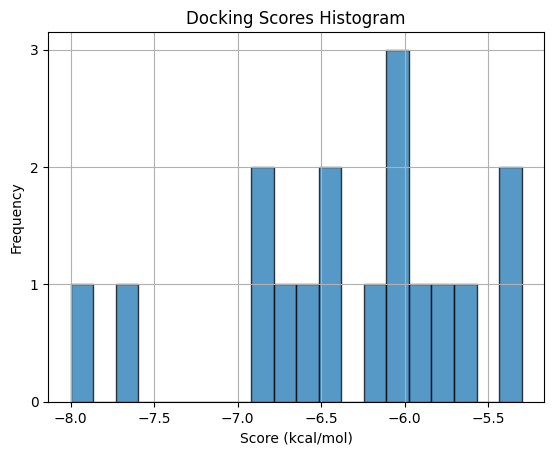

Histogram saved to /content/results/docking_scores_histogram.png


In [38]:
# Step 24: Create a histogram of docking scores
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file
csv_file = '/content/results/docking_results.csv'
df = pd.read_csv(csv_file, index_col=0)

# Display the histogram
plt.figure(figsize=(10, 6))
ax = df.plot(kind='hist', bins=20, alpha=0.75, edgecolor='black', legend=False)
ax.set_title('Docking Scores Histogram')
ax.set_xlabel('Score (kcal/mol)')
ax.set_ylabel('Frequency')
ax.grid(True)

# Add borders
for spine in ax.spines.values():
    spine.set_edgecolor('black')

# Set major ticks for the y-axis to every 1 unit
ax.yaxis.set_major_locator(plt.MultipleLocator(1))

# Save the image
output_image_path = '/content/results/docking_scores_histogram.png'
plt.savefig(output_image_path)

# Show the graph
plt.show()

print(f"Histogram saved to {output_image_path}")


In [39]:
# Step 25: Preparing to generate mapping images with STRING
# Create a CSV file listing UniProtID information

import os
import csv  # Added: Import the CSV module

# Function to get folder names from the file and list them
def get_folder_names(file_path):
    source_folders = []
    with open(file_path, 'r') as file:
        for line in file:
            folder_name = line.split(':')[0].strip()
            # Add the string with "AF-" and "-F1-model_v4_out" removed to the list
            folder_name = folder_name.replace('AF-', '').replace('-F1-model_v4_out', '')
            source_folders.append(folder_name)
    return source_folders

# Specify the name of the output CSV file and the column name
output_file = '/content/extracted_folders.csv'
column_name = 'UniprotID'

# Get and list the folder names
source_folders = get_folder_names('/content/pocket_centroids.txt')

# Write the listed folder names to a new CSV file
with open(output_file, 'w', newline='') as csvfile:  # 'newline=' is needed for Windows
    writer = csv.writer(csvfile)
    writer.writerow([column_name])  # Write the column name
    for folder_name in source_folders:
        writer.writerow([folder_name])  # Write the folder name

print(f'The extracted folder names have been output to {output_file}.')

The extracted folder names have been output to /content/extracted_folders.csv.


In [40]:
# Dictionary mapping species names to their NCBI IDs
species_ncbi_ids = {
    'Arabidopsis': 3702,
    'Nematode worm': 6239,
    'C. albicans': 237561,
    'Zebrafish': 7955,
    'Dictyostelium': 44689,
    'Fruit fly': 7227,
    'E. coli': 83333,
    'Soybean': 3847,
    'Human': 9606,
    'M. jannaschii': 243232,
    'Mouse': 10090,
    'Asian rice': 39947,
    'Rat': 10116,
    'Budding yeast': 559292,
    'Fission yeast': 284812,
    'Maize': 4577,
    'Ajellomyces capsulatus': 447093,
    'Brugia malayi': 6279,
    'C. jejuni': 192222,
    'Cladophialophora carrionii': 86049,
    'Dracunculus medinensis': 318479,
    'Enterococcus faecium': 1352,
    'Fonsecaea pedrosoi': 1442368,
    'H. influenzae': 71421,
    'H. pylori': 85962,
    'K. pneumoniae': 1125630,
    'L. infantum': 5671,
    'Madurella mycetomatis': 100816,
    'Mycobacterium leprae': 272631,
    'M. tuberculosis': 83332,
    'Mycobacterium ulcerans': 1299332,
    'N. gonorrhoeae': 242231,
    'Nocardia brasiliensis': 1133849,
    'Onchocerca volvulus': 6282,
    'Paracoccidioides lutzii': 502779,
    'P. falciparum': 36329,
    'P. aeruginosa': 208964,
    'S. typhimurium': 99287,
    'Schistosoma mansoni': 6183,
    'S. dysenteriae': 300267,
    'Sporothrix schenckii': 1391915,
    'S. aureus': 93061,
    'S. pneumoniae': 171101,
    'Strongyloides stercoralis': 6248,
    'Trichuris trichiura': 36087,
    'Trypanosoma brucei': 185431,
    'T. cruzi': 353153,
    'Wuchereria bancrofti': 6293,
}

# Prompt user to select a species
print("Select a species:")
for index, species in enumerate(species_ncbi_ids.keys(), 1):
    print(f"{index}. {species}")

selection = input("Enter the number corresponding to the desired species: ")

# Validate user input
try:
    selection_index = int(selection)
    if 1 <= selection_index <= len(species_ncbi_ids):
        selected_species = list(species_ncbi_ids.keys())[selection_index - 1]
        ncbi_id = species_ncbi_ids[selected_species]
    else:
        raise ValueError
except ValueError:
    print("Invalid input. Please enter a valid number.")
    exit()

print(f"NCBI ID for {selected_species}: {ncbi_id}")

Select a species:
1. Arabidopsis
2. Nematode worm
3. C. albicans
4. Zebrafish
5. Dictyostelium
6. Fruit fly
7. E. coli
8. Soybean
9. Human
10. M. jannaschii
11. Mouse
12. Asian rice
13. Rat
14. Budding yeast
15. Fission yeast
16. Maize
17. Ajellomyces capsulatus
18. Brugia malayi
19. C. jejuni
20. Cladophialophora carrionii
21. Dracunculus medinensis
22. Enterococcus faecium
23. Fonsecaea pedrosoi
24. H. influenzae
25. H. pylori
26. K. pneumoniae
27. L. infantum
28. Madurella mycetomatis
29. Mycobacterium leprae
30. M. tuberculosis
31. Mycobacterium ulcerans
32. N. gonorrhoeae
33. Nocardia brasiliensis
34. Onchocerca volvulus
35. Paracoccidioides lutzii
36. P. falciparum
37. P. aeruginosa
38. S. typhimurium
39. Schistosoma mansoni
40. S. dysenteriae
41. Sporothrix schenckii
42. S. aureus
43. S. pneumoniae
44. Strongyloides stercoralis
45. Trichuris trichiura
46. Trypanosoma brucei
47. T. cruzi
48. Wuchereria bancrofti
Enter the number corresponding to the desired species: 10
NCBI ID fo

In [41]:
# Using the UniProt IDs contained in a CSV file, retrieve the corresponding STRING IDs through the STRING database API
# Save the results to a text file

import requests
import pandas as pd

string_api_url = "https://version-11-5.string-db.org/api"
output_format = "tsv-no-header"
method = "get_string_ids"

##
## Load Uniprot IDs from CSV file
##
csv_file_path = "/content/extracted_folders.csv"  # Replace with the actual path to your CSV file
df = pd.read_csv(csv_file_path)

if selected_species in species_ncbi_ids:
    params = {
        "identifiers": "\r".join(df['UniprotID']),  # Assuming 'UniprotID' is the column name in your CSV file
        "species": species_ncbi_ids[selected_species],  # Use the NCBI ID corresponding to the selected species
        "limit": 1,  # only one (best) identifier per input protein
        "echo_query": 1,  # see your input identifiers in the output
        "caller_identity": "www.awesome_app.org"  # your app name
    }

    ##
    ## Construct URL
    ##
    request_url = "/".join([string_api_url, output_format, method])

    ##
    ## Call STRING
    ##
    results = requests.post(request_url, data=params)

    ##
    ## Read and parse the results
    ##
    output_lines = []
    for line in results.text.strip().split("\n"):
        l = line.split("\t")
        input_identifier, string_identifier = l[0], l[2]
        output_lines.append(f"Input: {input_identifier}\tSTRING: {string_identifier}")

    ##
    ## Write results to text file
    ##
    output_file_path = "/content/string_api_mapping.txt"
    with open(output_file_path, "w") as output_file:
        output_file.write("\n".join(output_lines))

    print(f"Mapping results saved to {output_file_path}")
else:
    print("Selected species not found in the database.")

Mapping results saved to /content/string_api_mapping.txt


In [42]:
# Read STRING IDs from a text file, generate a network image, and compress the output

import os
import requests
from time import sleep
import shutil
import tarfile

string_api_url = "https://version-11-5.string-db.org/api"
output_format = "image"
method = "network"

# Set the path to the output folder
output_folder = "/content/network_results"

# Create the output folder if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Read the STRING API from the file
with open("/content/string_api_mapping.txt", "r") as file:
    string_api_list = file.read().splitlines()

# Add the STRING API to the list
my_proteins = []
for line in string_api_list:
    if line.startswith("Input:"):
        parts = line.split("\t")
        protein_id = parts[1].split(":")[1].strip()  # Input: Q9NYA1 STRING: より後ろの文字列を取得して空白を除去
        my_proteins.append(protein_id)

##
## Construct URL
##
request_url = "/".join([string_api_url, output_format, method])

## For each protein call STRING
for protein in my_proteins:

    ##
    ## Set parameters
    ##
    params = {
        "identifiers": protein,  # your protein
        "species": species_ncbi_ids[selected_species],  # species NCBI identifier
        "add_white_nodes": 15,  # add 15 white nodes to my protein
        "network_flavor": "confidence",  # show confidence links
        "caller_identity": "www.awesome_app.org"  # your app name
    }

    ##
    ## Call STRING
    ##
    response = requests.post(request_url, data=params)

    ##
    ## Save the network to file
    ##
    file_name = os.path.join(output_folder, f"{protein}_network.png")
    print("Saving interaction network to %s" % file_name)

    with open(file_name, 'wb') as fh:
        fh.write(response.content)

    sleep(1)

# Compress output png files
def compress_files(input_folder, output_file):
    with tarfile.open(output_file, 'w:gz') as tar:
        tar.add(input_folder, arcname=os.path.basename(input_folder))

# Output compressed png file
compressed_png_file = '/content/compressed_output_png.tar.gz'
compress_files(output_folder, compressed_png_file)
print(f'Compressed PNG files saved to: {compressed_png_file}')


Saving interaction network to /content/network_results/243232.MJ_1171_network.png
Saving interaction network to /content/network_results/243232.MJ_0255_network.png
Saving interaction network to /content/network_results/243232.MJ_0082_network.png
Saving interaction network to /content/network_results/243232.MJ_0310_network.png
Saving interaction network to /content/network_results/243232.MJ_1251_network.png
Saving interaction network to /content/network_results/243232.MJ_0408_network.png
Saving interaction network to /content/network_results/243232.MJ_0389_network.png
Saving interaction network to /content/network_results/243232.MJ_1102_network.png
Saving interaction network to /content/network_results/243232.MJ_0452_network.png
Saving interaction network to /content/network_results/243232.MJ_1549_network.png
Saving interaction network to /content/network_results/243232.MJ_0166_network.png
Saving interaction network to /content/network_results/243232.MJ_0927_network.png
Saving interacti

In [43]:
# Step 26: Enter a CSV file containing UniProt IDs and add GO next to the UniProt column

import pandas as pd
from Bio import ExPASy
from Bio import SwissProt
from concurrent.futures import ThreadPoolExecutor

def get_go_info(uniprot_id):
    handle = ExPASy.get_sprot_raw(uniprot_id)
    record = SwissProt.read(handle)

    go_info = {'Molecular Function': '', 'Cellular Component': '', 'Biological Process': ''}
    for xref in record.cross_references:
        if xref[0] == 'GO':
            go_term = xref[2]
            if go_term.startswith('F:'):
                go_info['Molecular Function'] += go_term[2:] + ', '
            elif go_term.startswith('C:'):
                go_info['Cellular Component'] += go_term[2:] + ', '
            elif go_term.startswith('P:'):
                go_info['Biological Process'] += go_term[2:] + ', '

    for key in go_info:
        go_info[key] = go_info[key].rstrip(', ')

    return go_info

csv_file = '/content/extracted_folders.csv'
df = pd.read_csv(csv_file)

go_columns = ['Molecular Function', 'Cellular Component', 'Biological Process']
for col in go_columns:
    df[col] = ''

def process_row(row):
    uniprot_id = row['UniprotID']
    go_info = get_go_info(uniprot_id)
    for col in go_columns:
        row[col] = go_info[col]
    return row

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_row, df.to_dict('records')))

df_processed = pd.DataFrame(results)
output_file = '/content/extracted_folders_out.csv'
df_processed.to_csv(output_file, index=False)


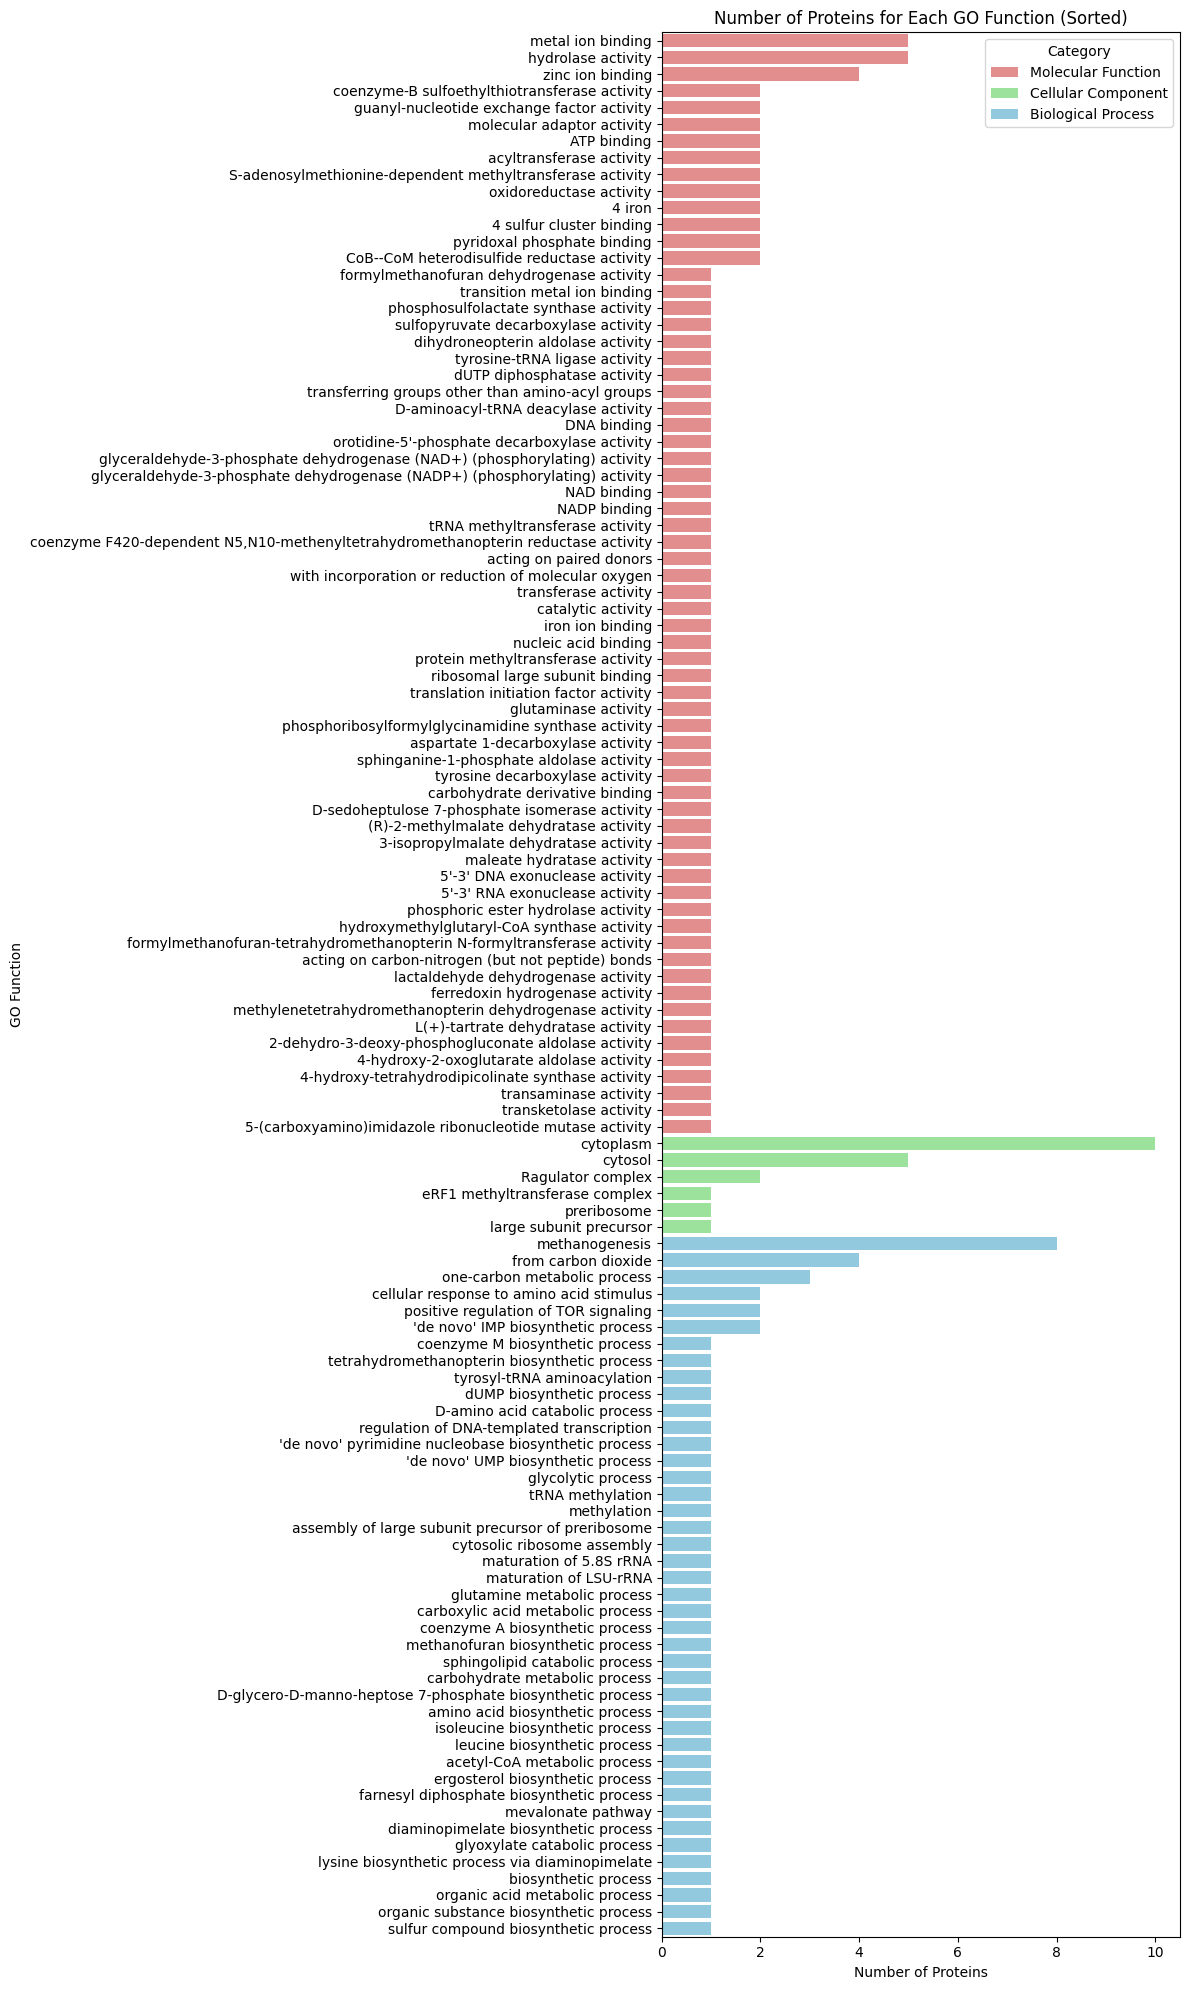

In [44]:
# Step 27: Reads a CSV file, counts and sorts GO functions by the number of proteins in each category, and plots a bar graph to visualize the results

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the existing DataFrame
csv_file = '/content/extracted_folders_out.csv'
df = pd.read_csv(csv_file)

# Count functions in each GO category
go_counts = {
    'Molecular Function': {},
    'Cellular Component': {},
    'Biological Process': {}
}

for index, row in df.iterrows():
    for category in go_counts.keys():
        if pd.notna(row[category]):
            functions = row[category].split(', ')
            for function in functions:
                if function:
                    if function not in go_counts[category]:
                        go_counts[category][function] = 0
                    go_counts[category][function] += 1

# Sort functions by the number of proteins in each category
sorted_go_counts = {}
for category, functions in go_counts.items():
    sorted_functions = sorted(functions.items(), key=lambda x: x[1], reverse=True)
    sorted_go_counts[category] = dict(sorted_functions)

# Convert to DataFrame
data = []
for category, functions in sorted_go_counts.items():
    for function, count in functions.items():
        data.append({'Function': function, 'Count': count, 'Category': category})

df_counts = pd.DataFrame(data)

# Set colors
palette = {
    'Biological Process': 'skyblue',
    'Cellular Component': 'lightgreen',
    'Molecular Function': 'lightcoral'
}

# Draw bar graph
plt.figure(figsize=(12, 20))

# Use Seaborn barplot to draw bar graph with different colors for each category
sns.barplot(x='Count', y='Function', hue='Category', data=df_counts, palette=palette, dodge=False)

plt.xlabel('Number of Proteins')
plt.ylabel('GO Function')
plt.title('Number of Proteins for Each GO Function (Sorted)')
plt.legend(title='Category')

plt.tight_layout()
plt.show()
